In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        S_legend = 'Susceptible'
        E.append(next_E)
        E_legend = 'Exposed'
        I.append(next_I)
        I_legend = 'Infected'
        R.append(next_R)
        R_legend = 'Recovered'
    return np.stack([S, E, I, R]).T, [S_legend, E_legend, I_legend, R_legend]

In [3]:
# Define parameters
t_max = 500
dt = .2
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 82000000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results_base, base_legends = base_seir_model(init_vals, params, t)

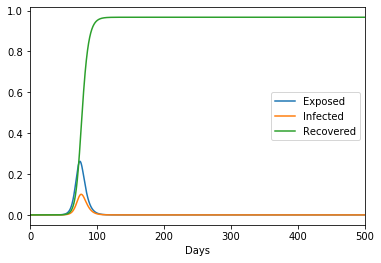

In [4]:
plt.plot(t, results_base[:,1:4])
plt.xlim(0,500)
plt.xlabel('Days')
plt.legend(base_legends[1:4])

In [5]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        S_legend = 'Susceptible-Social Dist.'
        E.append(next_E)
        E_legend = 'Exposed-Social Dist.'
        I.append(next_I)
        I_legend = 'Infected-Social Dist.'
        R.append(next_R)
        R_legend = 'Recovered-Social Dist.'
    return np.stack([S, E, I, R]).T, [S_legend, E_legend, I_legend, R_legend]

In [6]:
R0 = 3.5 # R0 = beta/gamma
alpha = 0.2 #The incubation period is considered 5 days. SO, alpha=(1/5)
beta = 1.75
gamma = 0.5 #The infectious period is considered 
rho = 0.5 
params = alpha, beta, gamma, rho
results, legends = seir_model_with_soc_dist(init_vals, params, t)

In [7]:
legends1 = base_legends + legends

In [8]:
#legends1[1:3]
legends1[5:7]

['Exposed-Social Dist.', 'Infected-Social Dist.']

Text(0.5, 0, 'Days')

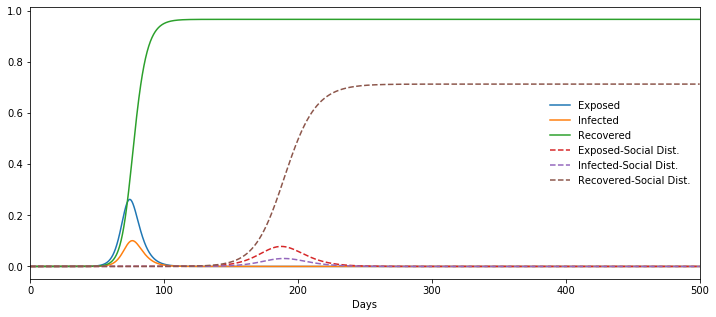

In [9]:
plt.figure(figsize=(12,5))
plt.plot(t,results_base[:,1], label=legends1[1])
plt.plot(t,results_base[:,2], label=legends1[2])
plt.plot(t,results_base[:,3], label=legends1[3])

plt.plot(t,results[:,1], label=legends1[5], linestyle='--')
plt.plot(t,results[:,2], label=legends1[6], linestyle='--')
plt.plot(t,results[:,3], label=legends1[7], linestyle='--')

plt.legend(frameon=False);
plt.xlim(0,500)
plt.xlabel('Days')